In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()
nb_classes = 10 # 類別的數目
x_train_image = x_train_image.reshape(60000, 784).astype('float32')
x_test_image = x_test_image.reshape(10000, 784).astype('float32')
x_train_image /= 255
x_test_image /= 255
y_train_cat = np_utils.to_categorical(y_train_label, nb_classes)
y_test_cat = np_utils.to_categorical(y_test_label, nb_classes)
model = Sequential()
model.add(Dense(50, input_shape=(784,)))
model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.
C:\Users\hello\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hello\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hello\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hello\AppData\Roa

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [2]:
epochs = 10
history = model.fit(x_train_image,
y_train_cat,
epochs=epochs,
batch_size=128,
verbose=1)

Epoch 1/10
60000/60000 [==============================] - 0s 8us/step - loss: 1.0006 - acc: 0.7492
Epoch 2/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.5269 - acc: 0.8648
Epoch 3/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.4404 - acc: 0.8810
Epoch 4/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.4004 - acc: 0.8893
Epoch 5/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.3767 - acc: 0.8951
Epoch 6/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.3606 - acc: 0.8986
Epoch 7/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.3490 - acc: 0.9017
Epoch 8/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.3398 - acc: 0.9045
Epoch 9/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.3325 - acc: 0.9064
Epoch 10/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.3265 - acc: 0.9081


accuracy = 91.32%


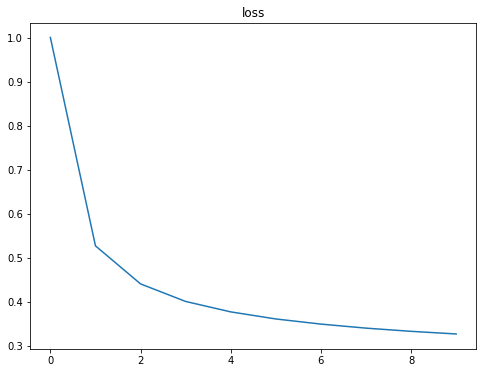

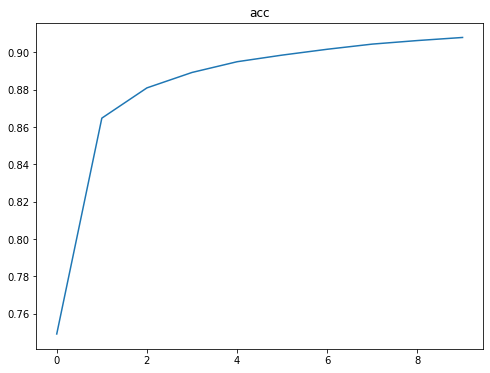

In [3]:
plt.figure(figsize=(8,6))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(8,6))
plt.plot(history.epoch,history.history['acc'])
plt.title('acc')

scores = model.evaluate(x_test_image, y_test_cat, verbose=2)
print("accuracy = {:2.2f}%".format(scores[1]*100.0))